In [2]:
import pandas as pd

In [3]:
iris = pd.read_csv("iris.csv")

In [4]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
#head, tail - wyswietlanie n pierwszych ostatnich
#loc[n] - indeks od tablicy

In [6]:
iris.loc[10].tolist()

[5.4, 3.7, 1.5, 0.2, 'Setosa']

In [7]:
iris.at[2,"sepal.width"]

3.2

In [8]:
columns = iris.columns.tolist()
columns
type(iris)

pandas.core.frame.DataFrame

In [9]:
iris.iat[0,0]

5.1

In [10]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
import seaborn as sks


In [13]:
sks.set_palette("Reds")

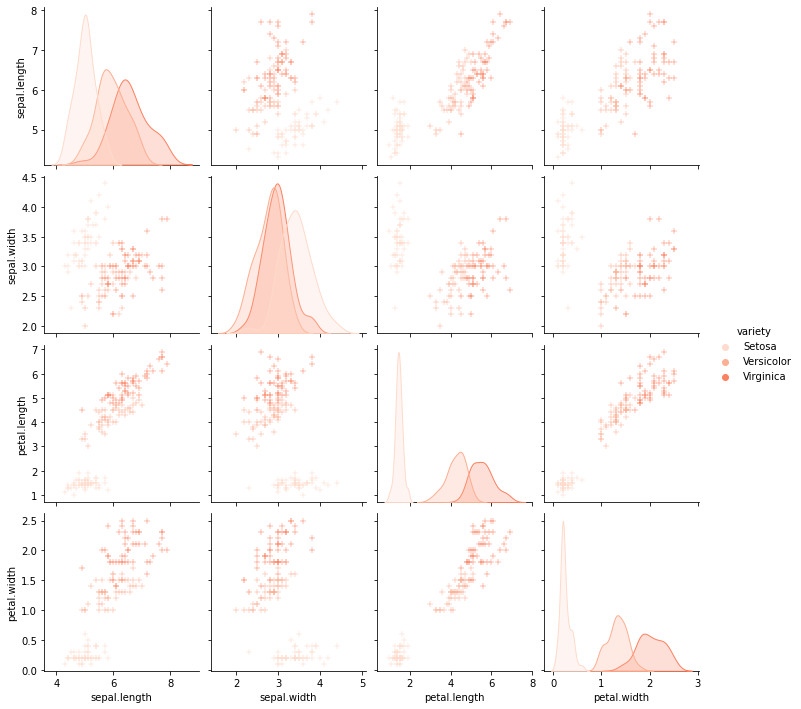

In [14]:
sks.pairplot(iris,hue='variety', markers="+")

<AxesSubplot:xlabel='sepal.length', ylabel='variety'>

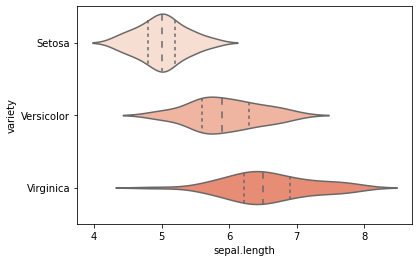

In [15]:
sks.violinplot(data=iris,x="sepal.length",y="variety",inner="quartile")

In [16]:
# przed-ostatni zamiemianmy z wczesniej wylosowanym od konca do poczatku
# x' = (x-xmin)/(xmax-xmin)

# podzial zbioru na zbior trenignowy i zbior testowy np:
# splitset(data,d)  gdzie  dE(0,1), czesto sie bierze 70% wyniku 30% testu
import random

In [17]:
class ProcessingData:
    
    @staticmethod
    def shuffle(data: pd.DataFrame) -> pd.DataFrame:
        for i in range(len(data)):
            j = random.randint(0,len(data)-1)
            data.iloc[i],data.iloc[j] = data.iloc[j],data.iloc[i]
        return data
    @staticmethod
    def normalize(data: pd.DataFrame,columns: list) -> pd.DataFrame:
        for column in columns:
            x = data[column].max()
            y = data[column].min()
            data[column] = (data[column]-y)/(x-y)
        return data      
    @staticmethod
    def split(data: pd.DataFrame) -> pd.DataFrame:
        train_set = pd.DataFrame(columns=data.columns)
        test_set = pd.DataFrame(columns=data.columns)
        for i in range(len(data)):
            if random.random() < 0.7:
                train_set = train_set.append(data.iloc[i])
            else:
                test_set = test_set.append(data.iloc[i])
        return train_set,test_set


In [22]:
#mam przyklad, mam baze wiedzy, do wsyzzstkich elemntow trzeba obliczyc odl
#wybieram najblizszych
#zliczam ktorych jest najwiecej
#jako hipoteza daje to ktory najczesciej wystepuje
# k,m  

# co trzeba zaimplementowac:
#   odleglosc = dist(x,y,m)
#   q(s,dataset,m,k) gdzie m to metryka a k to ilosc sasiadow

#   a) odleglosc od kazdego elementu d
#   b) sortujemy po odleglosciach
#   c) do ktorej z klas naleza elementy, jako najliczniejsza dajemy ten najbardziej rozpoznany

In [50]:
class KMM:
    @staticmethod
    def distance(x: pd.Series,y: pd.Series,m: int) -> float:
        return sum([abs(x-y)**m for x,y in zip(x,y)])**(1/m)
    
    @staticmethod
    def q(s: pd.Series, dataset: pd.DataFrame, m: int, k: int) -> str:

In [54]:
#przetestuj dla każdego rekordu ze zbioru walidacyjnego przy uzyciu zbioru treningowego
#nastepnie wyznacz dokladnosc przy uzyciu k=2, k=3, k=4

dataset = ProcessingData.shuffle(iris)
dataset = ProcessingData.normalize(dataset,['sepal.length','sepal.width','petal.length','petal.width'])
train_set,test_set = ProcessingData.split(dataset)